## Ingeniería de Características: Transformaciones de Variables (Core)

**Descripción:**

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

Enlace al dataset: [House prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)



**Objetivo:**

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.



Instrucciones:

### 1. Carga de datos:
  - Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.
  - Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.


In [2]:
# Librerias para carga y exploración de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train = pd.read_csv('../data/house_prices-advanced_regression_techniques/train.csv')
print(df_train.info())
df_train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
#relleno los valores nulos encontrados en nuestro data_description
#Primero hecho por mi y optimizado por Claude AI
# Create a dictionary mapping columns to their fill values
fill_values = {
    'PoolQC': 'No Pool',
    'MiscFeature': 'None',
    'Alley': 'No alley access',
    'Fence': 'No Fence',
    'MasVnrType': 'Unknown',
    'FireplaceQu': 'No Fireplace',
    'GarageFinish': 'No Garage',
    'GarageType': 'No Garage',
    'GarageQual': 'No Garage',
    'GarageCond': 'No Garage',
    'BsmtFinType2': 'No Basement',
    'BsmtExposure': 'No Basement',
    'BsmtQual': 'No Basement',
    'BsmtCond': 'No Basement',
    'BsmtFinType1': 'No Basement'
}

# Apply all fill operations at once
df_train = df_train.fillna(fill_values)

In [8]:
#Calculamos los valores nulos 
#Codigo Hecho por el profesor Iair Linker
def calculate_na_statistics(df: pd.DataFrame):
    qsna = df.shape[0] - df.isnull().sum(axis=0)
    qna = df.isnull().sum(axis=0)
    ppna = np.round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
    aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
    na = pd.DataFrame(data=aux)
    return na.sort_values(by='Na en %', ascending=False)

null_values = calculate_na_statistics(df_train)
null_values

,datos sin NAs en q,Na en q,Na en %
LotFrontage,1201,259,17.74
GarageYrBlt,1379,81,5.55
MasVnrArea,1452,8,0.55
Electrical,1459,1,0.07
KitchenAbvGr,1460,0,0.00
...,...,...,...
ExterQual,1460,0,0.00
MasVnrType,1460,0,0.00
Exterior2nd,1460,0,0.00
Exterior1st,1460,0,0.00


         GrLivArea        LotArea  TotalBsmtSF     1stFlrSF     2ndFlrSF
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000
mean   1515.463699   10516.828082  1057.429452  1162.626712   346.992466
std     525.480383    9981.264932   438.705324   386.587738   436.528436
min     334.000000    1300.000000     0.000000   334.000000     0.000000
25%    1129.500000    7553.500000   795.750000   882.000000     0.000000
50%    1464.000000    9478.500000   991.500000  1087.000000     0.000000
75%    1776.750000   11601.500000  1298.250000  1391.250000   728.000000
max    5642.000000  215245.000000  6110.000000  4692.000000  2065.000000


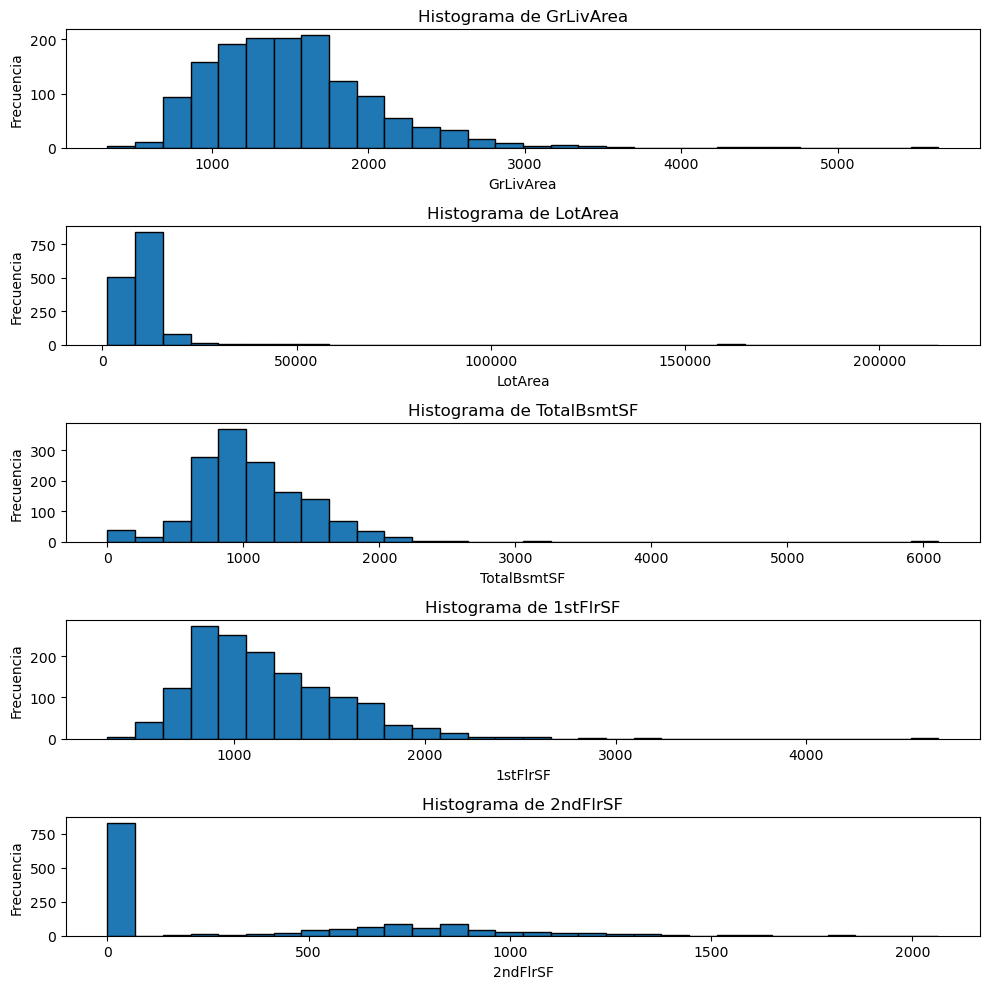

In [9]:
# Columnas relacianadas con el tamano
size_related = ['GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']
# vemos los tipos de datos de size_related
df_train[size_related].dtypes

print(df_train[size_related].describe())

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 10))

# Crear un histograma para cada columna numérica
for i, column in enumerate(size_related, 1):
    plt.subplot(len(size_related), 1, i)
    plt.hist(df_train[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

OverallQual     int64
KitchenQual    object
BsmtQual       object
ExterQual      object
dtype: object
       OverallQual
count  1460.000000
mean      6.099315
std       1.382997
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000


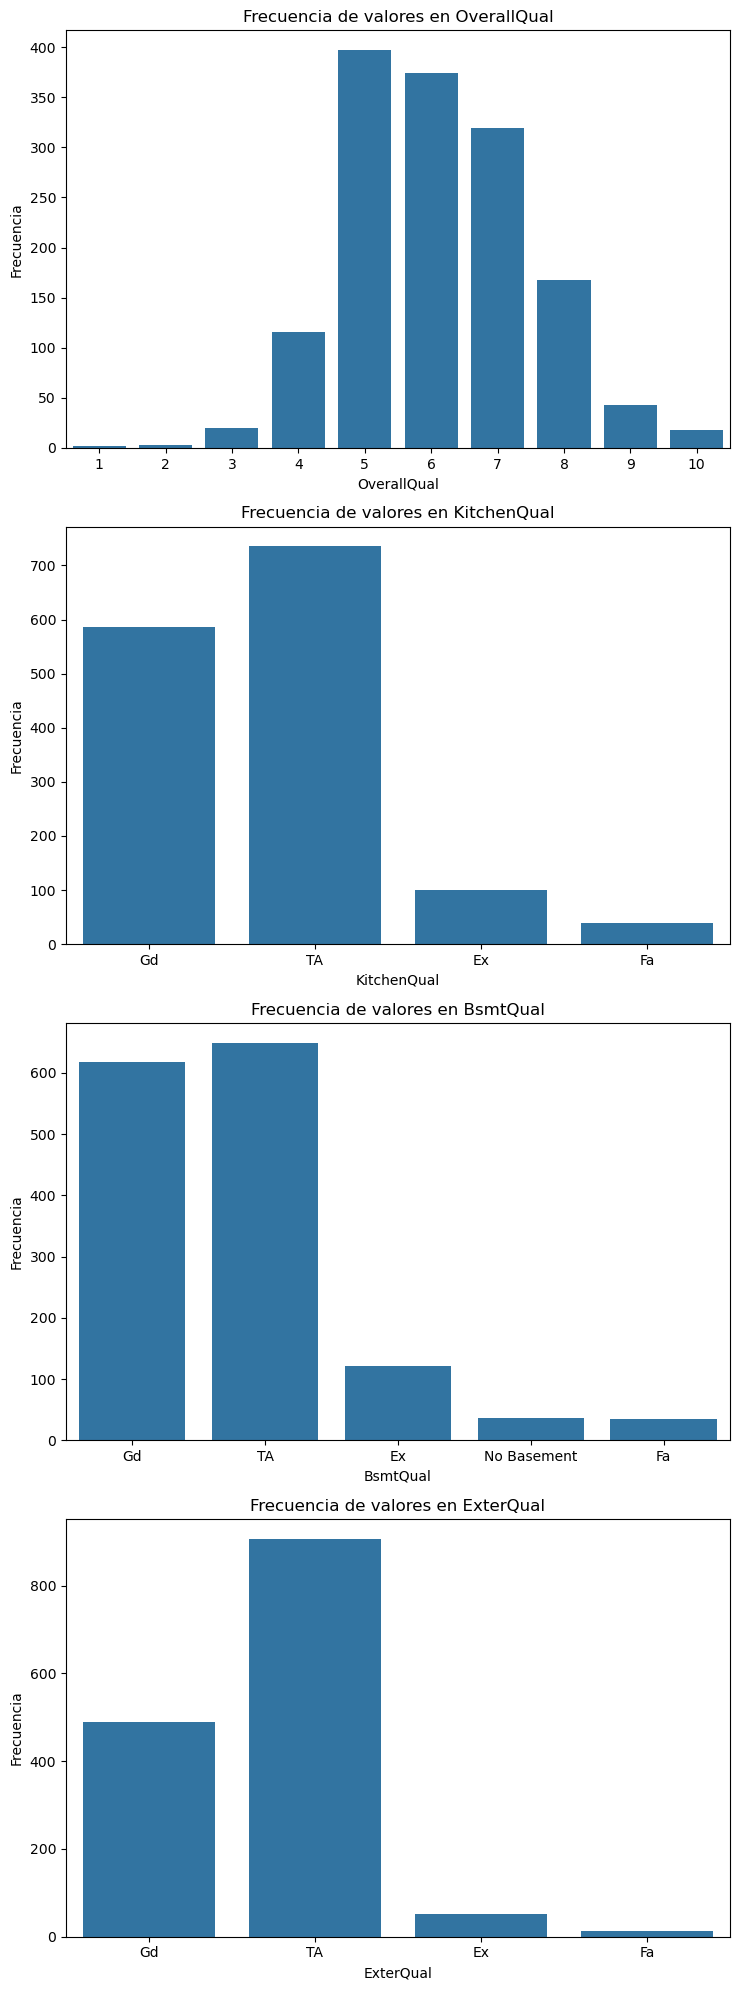

In [10]:
# Columnas relacianadas con la calidad
qual_related = ['OverallQual', 'KitchenQual', 'BsmtQual', 'ExterQual']
# vemos los tipos de datos de size_related
print(df_train[qual_related].dtypes)

print(df_train[qual_related].describe())

# Configuración del tamaño de la gráfica
plt.figure(figsize=(7.5, 5 * len(qual_related)))
# Crear un gráfico de conteo para cada columna booleana
for i, column in enumerate(qual_related, 1):
    plt.subplot(len(qual_related), 1, i)
    sns.countplot(x=df_train[column])
    plt.title(f'Frecuencia de valores en {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

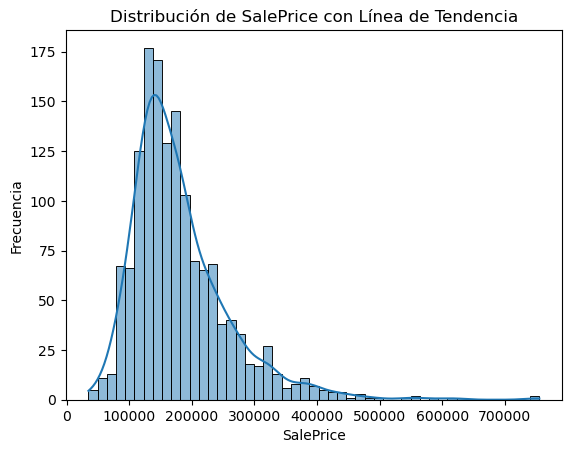

In [12]:
# Supongamos que tienes un DataFrame llamado df y una columna 'saleprice'
sns.histplot(df_train['SalePrice'], kde=True)

# Personaliza el gráfico
plt.title('Distribución de SalePrice con Línea de Tendencia')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()


In [13]:
#Transformar las columnas de tipo 'object' a 'category'
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column] = df_train[column].astype('category')


### 2. Exploración y preprocesamiento de datos:
  - Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
  - También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.


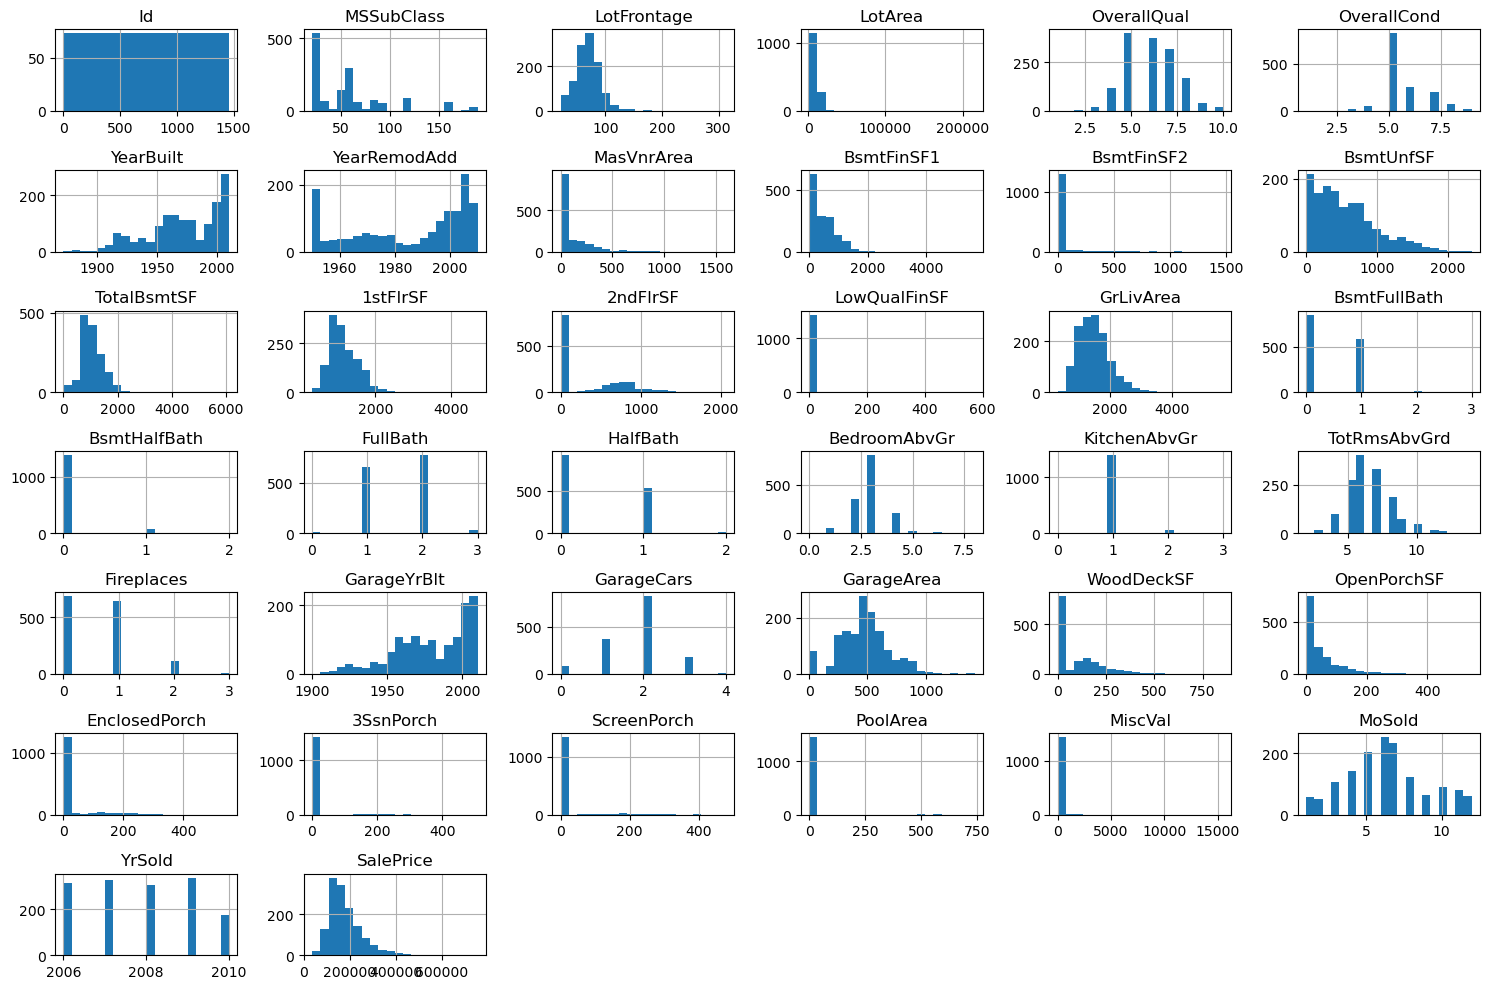

In [14]:
df_train.hist(bins=20,figsize=(15,10))
plt.tight_layout()
plt.show()

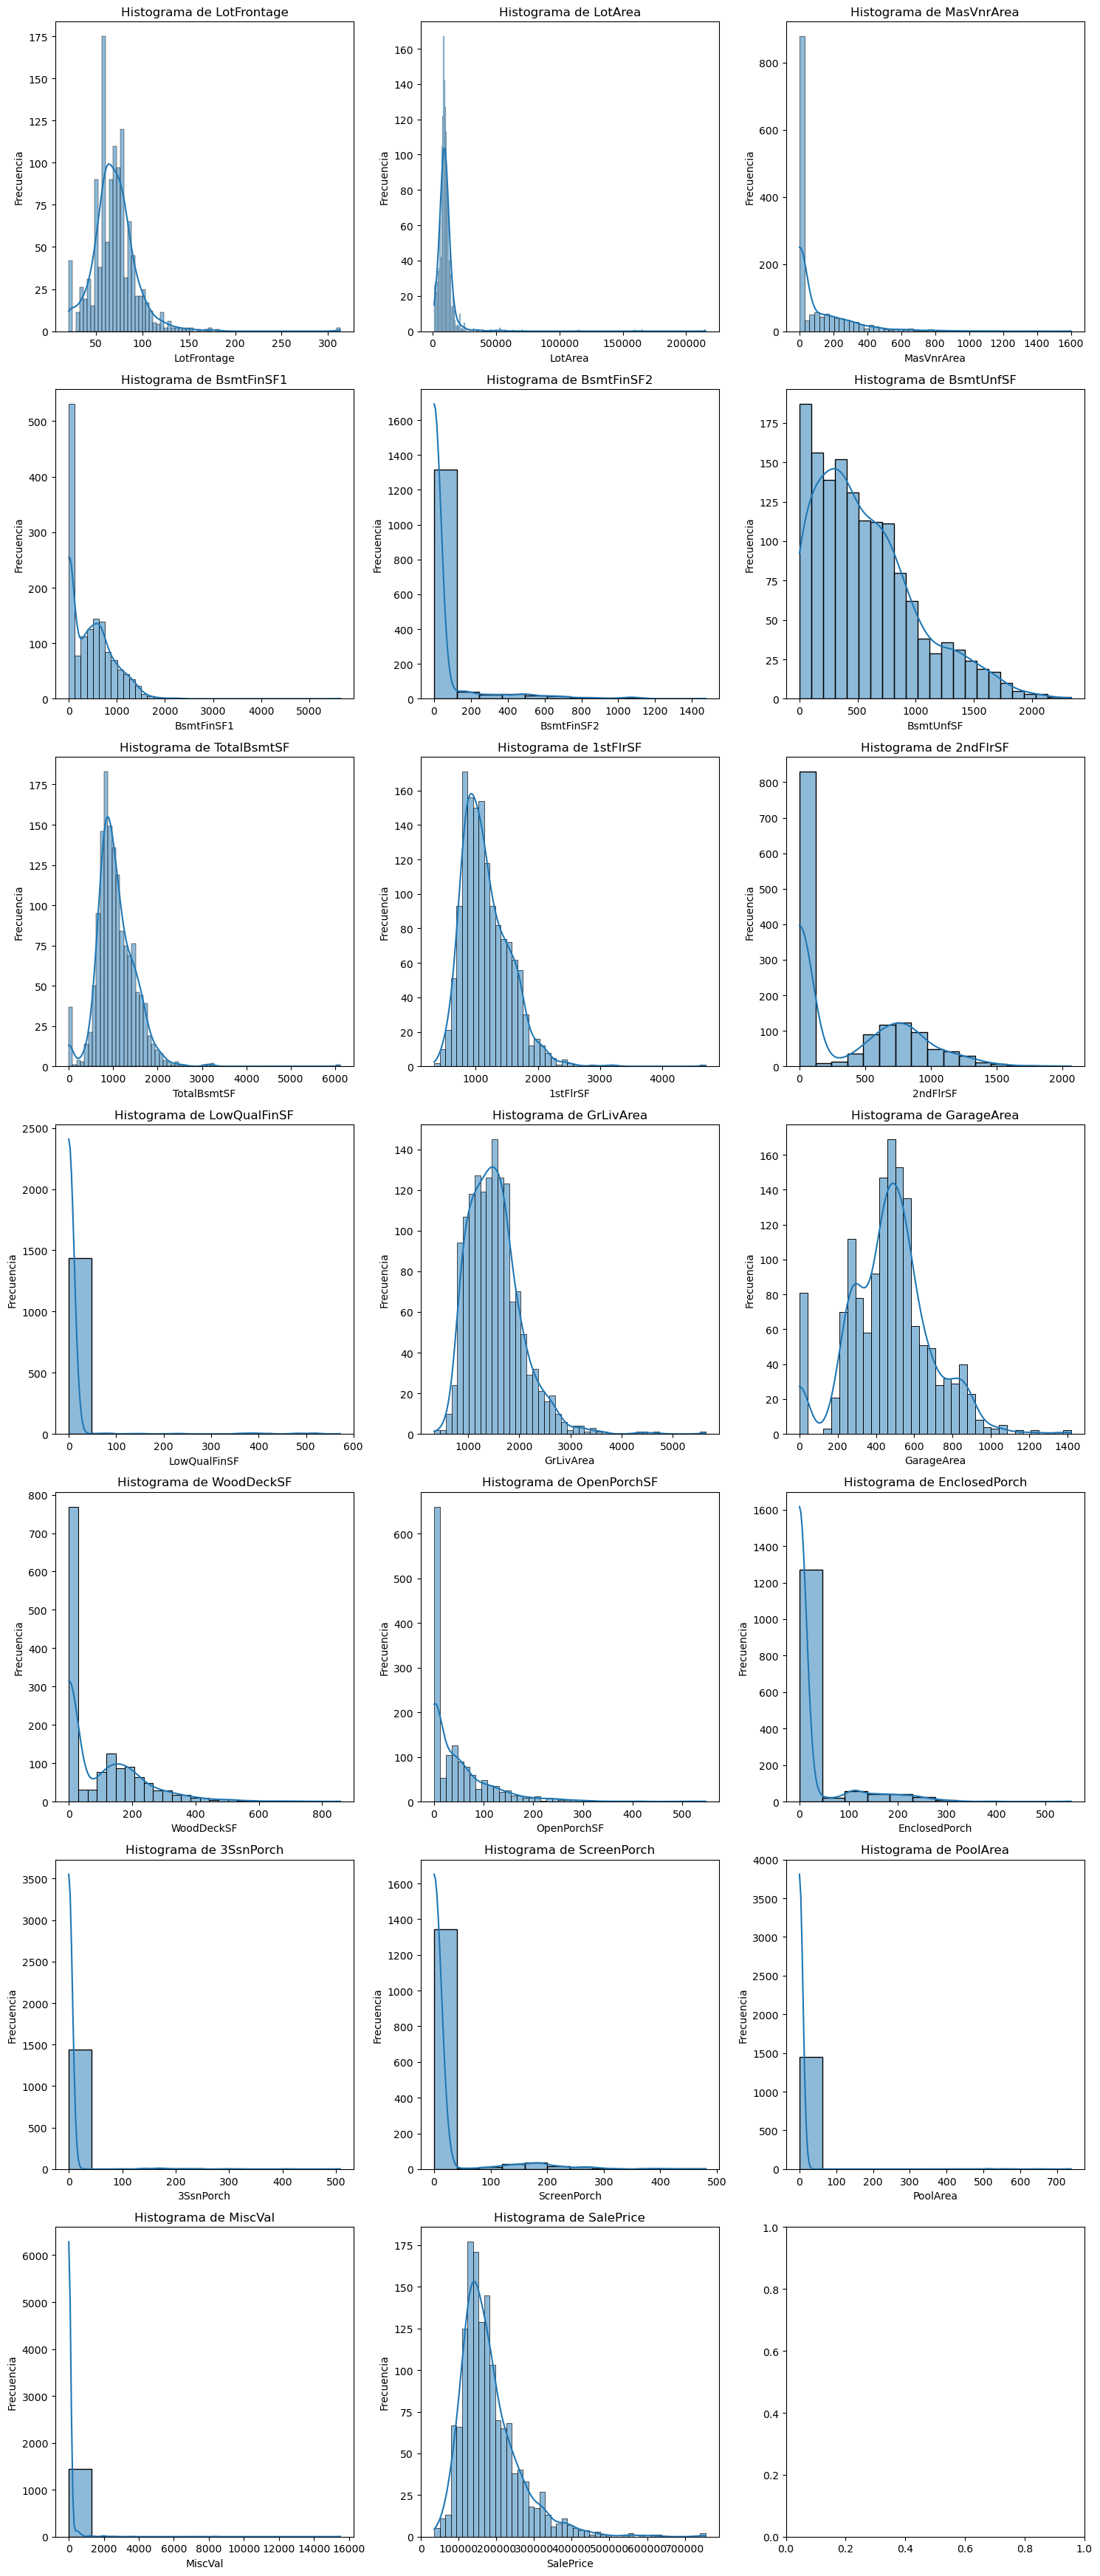

In [ ]:
#sin valores clasificatorios, discretos u ordinales
# Lista de columnas a excluir
excluded_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                    'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'Id', 'YearBuilt',
                    'YearRemodAdd', 'GarageYrBlt']

# Filtrar columnas numéricas que no están en la lista de exclusión
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
filtered_columns = [col for col in numeric_columns if col not in excluded_columns]

# Número de columnas para el grid
num_cols = 3

# Calcular el número de filas necesarias
num_rows = (len(filtered_columns) + num_cols - 1) // num_cols

# Crear subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Crear histogramas para cada columna filtrada
for i, col in enumerate(filtered_columns):
    sns.histplot(df_train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()




### 3. Transformaciones de variables:
  - Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.
  - Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.
  - Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.



### 4. Evaluación de las transformaciones:
  - Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
  - Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.



### 5. Interpretación de los resultados:
  - Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas.
  - Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.





### Análisis de Resultados:

  - El análisis debe centrarse en cómo las diferentes transformaciones afectaron la distribución de las variables y cómo esto influyó en la precisión del modelo predictivo. Discute las ventajas y desventajas de las transformaciones aplicadas y su relevancia en problemas de regresión.